In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit, minimize
from collections import Counter
from scipy import interpolate

In [16]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

## Rule 30 MIPT check running exponents One Bit
Asites=1, Bsites=50:200, nsteps=0:0.5*nBsite p=0:0.001:0.3, 1-4

Asites=1, Bsites=100:400, nsteps=0.5*nBsite p=0:0.001:0.3, 11-14 oneMeas

Asites=1, Bsites=100:400, nsteps=0.5*nBsite p=0.19:0.001:0.21, 31-34 oneMeas

Asites=1, Bsites=100:400, nsteps=3.5*nBsite p=0.15:0.005:0.25, 41-44 oneMeas

Asites=1, Bsites=100:400, nsteps=3.5*nBsite p=0.20:0.0005:0.21, 51-54 oneMeas

Asites=1, Bsites=100:400, nsteps=3.5*nBsite p=0.204:0.0001:0.206, 61-64 oneMeas 1M nsim

Asites=1, Bsites=100:400, nsteps=3.5*nBsite p=0.2053:0.00001:0.2056, 71-74 oneMeas 1M nsim

Asites=1, Bsites=100:400, nsteps=0.5*nBsite p=0.201:0.0001:0.203, 81-84 oneMeas

Asites=1, Bsites=100:400, nsteps=0.5*nBsite p=0.201:0.0001:0.203, 91-94 oneMeas 1M nsim

Asites=1, Bsites=100:400, nsteps=3.5*nBsite p=0.20:0.001:0.21, 104 oneMeas 1M nsim

Asites=1, Bsites=100:400, nsteps=0.5*nBsite p=0.19:0.001:0.21, 114 oneMeas 1M nsim

Asites=1, Bsites=100:400, nsteps=1.5*nBsite p=0.19:0.001:0.21, 124 oneMeas

Asites=1, Bsites=100:400, nsteps=1.5*nBsite p=0.20:0.001:0.21, 134 oneMeas 100k nsim

Asites=1, Bsites=100:400, nsteps=2.5*nBsite p=0.20:0.001:0.21, 144 oneMeas 100k nsim

Asites=1, Bsites=100:400, nsteps=4.5*nBsite p=0.20:0.001:0.21, 154 oneMeas 100k nsim

Asites=1, Bsites=100:400, nsteps=2.5*nBsite p=0.204:0.0002:0.206, 164 oneMeas 100k nsim

Asites=1, Bsites=100:400, nsteps=0.25*nBsite p=0.15:0.01:0.25, 164 oneMeas 1k nsim

Asites=1, Bsites=100:400, nsteps=0.25*nBsite p=0.19:0.01:0.21, 174 oneMeas 100k nsim

In [36]:
file_idx = 74
# file_name = "../data/240414/240414_n%d_pp.npz"%(file_idx)
# raw = np.load(file_name)
# nmeas_l = raw['y_l']
# nsteps_l = raw['x_l']
# pertb_l = raw['z_l']
# S_ave_arr = raw['data_ave_l']
# S_std_arr = raw['data_std_l']

file_name = "../data/240414/240414_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(6,5))
plt.imshow(S_ave_arr[200,:,:],aspect="auto",cmap="Oranges")
# for pertb_idx in range(0,50,5):
#     plt.plot(np.arange(2*nsteps_l[-1]), S_ave_arr[pertb_idx,10,:])

FileNotFoundError: ../data/240414/240414_74_scanz.csv not found.

In [37]:
for pertb_idx, pertb in enumerate(pertb_l):
    if pertb_idx < 240:
        continue
    S_l = S_ave_arr[pertb_idx,-1,:]
    delta_l = []
    for t in range(int(len(nstep_l)/2)):
        delta_l.append(np.log2(S_l[t]/S_l[2*t]))
    plt.plot(1/np.arange(int(len(nstep_l)/2)), delta_l)

### fit running exponents

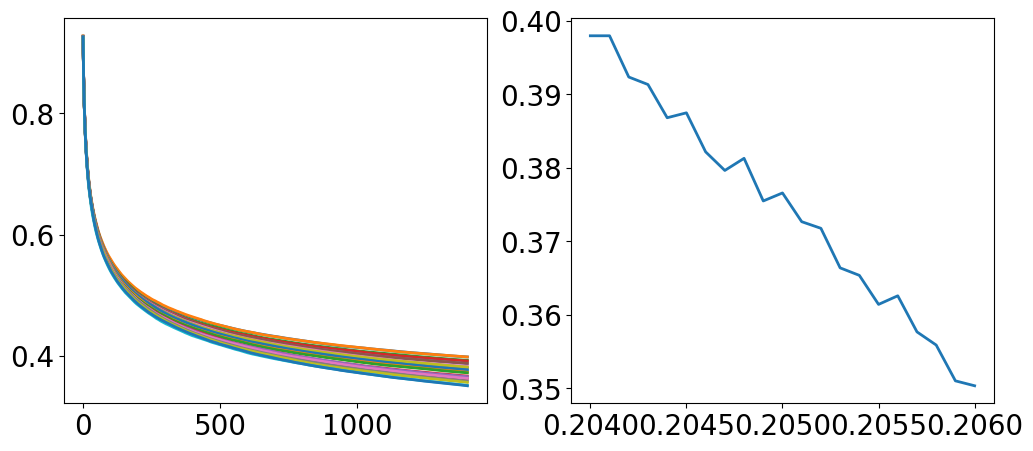

In [42]:
file_idx = 64
# file_name = "../data/240414/240414_n%d_pp.npz"%(file_idx)
# raw = np.load(file_name)
# nmeas_l = raw['y_l']
# nsteps_l = raw['x_l']
# pertb_l = raw['z_l']
# S_ave_arr = raw['data_ave_l']
# S_std_arr = raw['data_std_l']

file_name = "../data/240414/240414_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for pertb_idx in range(0,len(pertb_l),1):
    plt.plot(nstep_l,S_ave_arr[pertb_idx,:])
#     plt.plot(np.arange(2*nsteps_l[-1]), S_ave_arr[pertb_idx,10,:])
plt.subplot(1,2,2)
plt.plot(pertb_l,S_ave_arr[:,-1])

/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_53979/1690882127.py:14: RuntimeWarning: divide by zero encountered in divide
  plt.plot((1/np.arange(int(len(nstep_l)/base))), delta_l, '.-')
/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_53979/1690882127.py:15: RuntimeWarning: divide by zero encountered in divide
  plt.plot((1/np.arange(int(len(nstep_l)/base)))[-50:], delta_l[-50:], '.-')
/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_53979/1690882127.py:17: RuntimeWarning: divide by zero encountered in divide
  slope, intercept = np.polyfit((1/np.arange(int(len(nstep_l)/base)))[-nfit:], delta_l[-nfit:], deg=1)


Text(0, 0.5, '$\\delta(t)$')

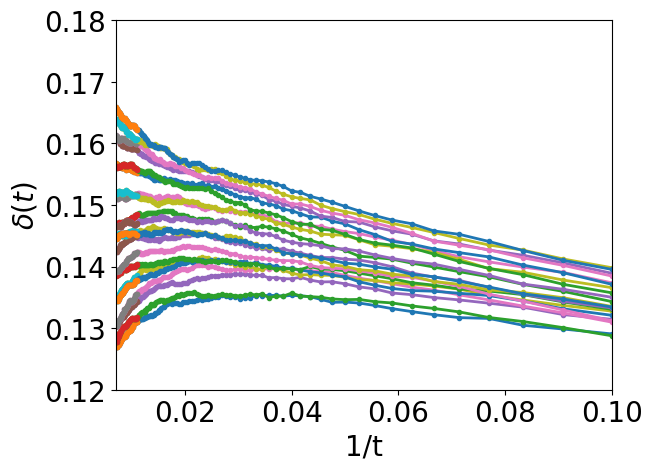

In [51]:
base = 10

slope_l = []
intercept_l = []
for pertb_idx, pertb in enumerate(pertb_l):
    # if pertb < 0.15 or pertb > 0.21:
    #     continue
    # if pertb_idx < 0 or pertb_idx > 12:
    #     continue
    S_l = S_ave_arr[pertb_idx,:]
    delta_l = []
    for t in range(int(len(nstep_l)/base)):
        delta_l.append(np.emath.logn(base,S_l[t]/S_l[base*t]))
    plt.plot((1/np.arange(int(len(nstep_l)/base))), delta_l, '.-')
    plt.plot((1/np.arange(int(len(nstep_l)/base)))[-50:], delta_l[-50:], '.-')
    nfit = 10
    slope, intercept = np.polyfit((1/np.arange(int(len(nstep_l)/base)))[-nfit:], delta_l[-nfit:], deg=1)
    slope_l.append(slope)
    intercept_l.append(intercept)

    # for t in range(int(len(nstep_l)/10)):
    #     delta_l.append(np.log10(S_l[t]/S_l[2*t]))
    # plt.plot(1/np.arange(int(len(nstep_l)/10)), delta_l)

plt.xlim([1/int(len(nstep_l)/base),0.1])
plt.ylim([0.12,0.18])
plt.xlabel("1/t")
plt.ylabel("$\delta(t)$")

In [489]:
pertb_l

array([0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25])

0.2053 0.15152678337451922


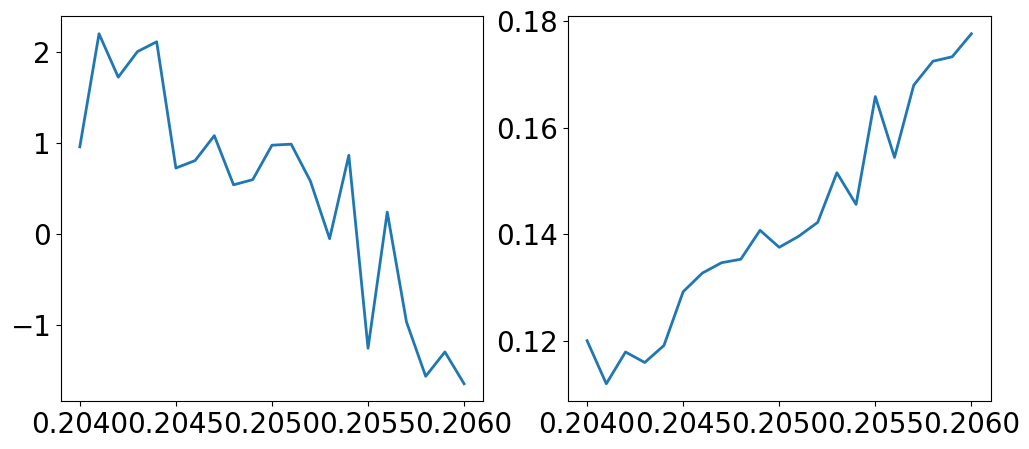

In [52]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(pertb_l,slope_l)
plt.subplot(1,2,2)
plt.plot(pertb_l,intercept_l)

idxmin = np.argmin(np.abs(slope_l))
pc = pertb_l[idxmin]
delta = intercept_l[idxmin]
print(pc,delta)

### t = 0.25*nBsites

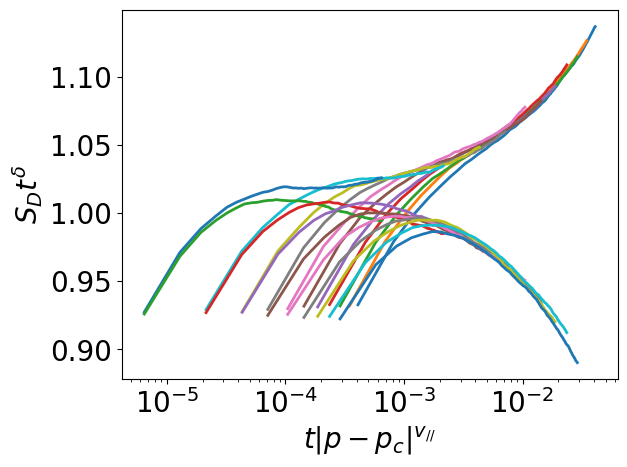

In [507]:
file_idx = 174

file_name = "../data/240414/240414_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nstep_l)))

nv = 1.73
pc = 0.201
delta = 0.12101787628581845
for pertb_idx in range(0,len(pertb_l),1):
    xplot = nstep_l * np.abs(pertb_l[pertb_idx]-pc)**nv
    yplot = S_ave_arr[pertb_idx,:] * nstep_l**delta
    # xplot = nstep_l[-190:] * np.abs(pertb_l[pertb_idx]-pc)**nv
    # yplot = S_ave_arr[pertb_idx,-190:] * nstep_l[-190:]**delta
    plt.plot(xplot,yplot)

# plt.xlim([1e-3,1e-1])
plt.xlabel("$t |p-p_c|^{v_{//}}$")
plt.ylabel("$S_D t^{\delta}$")
plt.xscale('log')

### t = 0.5*nBsites

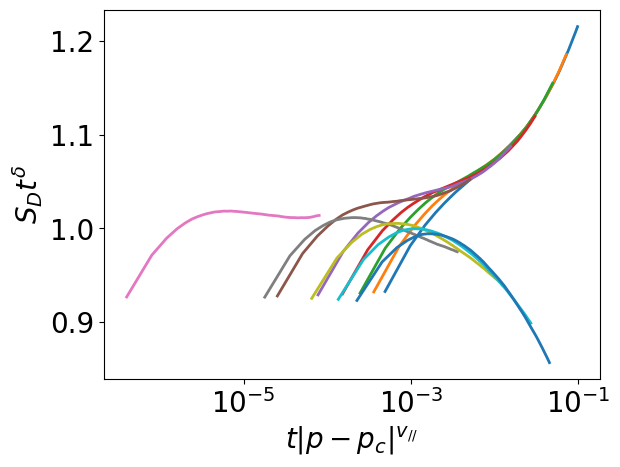

In [446]:
file_idx = 114

file_name = "../data/240414/240414_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nstep_l)))

nv = 1.73
pc = 0.2022
delta = 0.1240125838019527
for pertb_idx in range(0,len(pertb_l),1):
    xplot = nstep_l * np.abs(pertb_l[pertb_idx]-pc)**nv
    yplot = S_ave_arr[pertb_idx,:] * nstep_l**delta
    # xplot = nstep_l[-190:] * np.abs(pertb_l[pertb_idx]-pc)**nv
    # yplot = S_ave_arr[pertb_idx,-190:] * nstep_l[-190:]**delta
    plt.plot(xplot,yplot)
    
# plt.xlim([1e-3,1e-1])
plt.xlabel("$t |p-p_c|^{v_{//}}$")
plt.ylabel("$S_D t^{\delta}$")
plt.xscale('log')

### t=1.5*nBsites

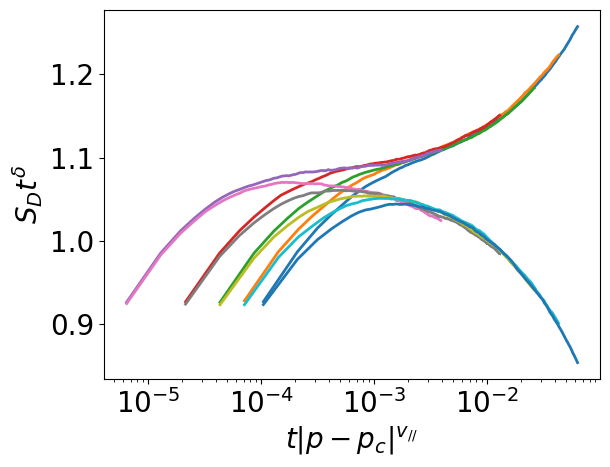

In [464]:
file_idx = 134

file_name = "../data/240414/240414_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nstep_l)))

nv = 1.73
pc = 0.205
# pc = 0.2056
delta = 0.14502491626909325
# delta = 0.159
# delta = 0.1240125838019527
for pertb_idx in range(0,len(pertb_l),1):
    xplot = nstep_l[0:] * np.abs(pertb_l[pertb_idx]-pc)**nv
    yplot = S_ave_arr[pertb_idx,0:] * nstep_l[0:]**delta
    plt.plot(xplot,yplot)

# plt.xlim([1e-5,1e-1])
plt.xlabel("$t |p-p_c|^{v_{//}}$")
plt.ylabel("$S_D t^{\delta}$")
plt.xscale('log')

### t=2.5*nBsites

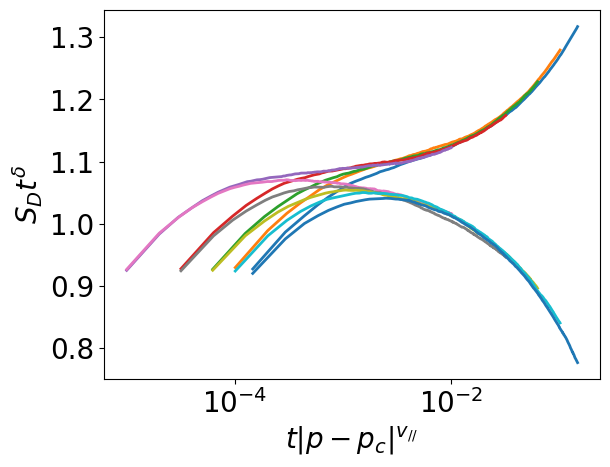

In [104]:
file_idx = 144

file_name = "../data/240414/240414_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nstep_l)))

# nv = 1.73
nv = 1.666
# pc = 0.205
pc = 0.205
# delta = 0.14834225364675283
# delta = 0.159
delta = 0.1449
# delta = 0.1240125838019527
for pertb_idx in range(0,len(pertb_l),1):
    xplot = nstep_l[0:] * np.abs(pertb_l[pertb_idx]-pc)**nv
    yplot = S_ave_arr[pertb_idx,0:] * nstep_l[0:]**delta
    plt.plot(xplot,yplot)

# plt.xlim([1e-5,1e-1])
plt.xlabel("$t |p-p_c|^{v_{//}}$")
plt.ylabel("$S_D t^{\delta}$")
plt.xscale('log')

In [103]:
pc = 0.205

def fit_exp(x):
    nv = x[0]
    delta = x[1]
    xm_ground = nstep_l[0:] * np.abs(pertb_l[0]-pc)**nv
    ym_ground = S_ave_arr[0,0:] * nstep_l[0:]**delta
    xp_ground = nstep_l[0:] * np.abs(pertb_l[-1]-pc)**nv
    yp_ground = S_ave_arr[0,0:] * nstep_l[0:]**delta
    
    cost = 0
    for pertb_idx in range(1,5,1):
        x = nstep_l[0:] * np.abs(pertb_l[pertb_idx]-pc)**nv
        y = S_ave_arr[pertb_idx,0:] * nstep_l[0:]**delta
        interp = interpolate.interp1d(x, y)
        xm_ground_interp = xm_ground[np.logical_and(xm_ground > 1e-2, xm_ground < x[-1])]
        if len(xm_ground_interp) == 0:
            continue
        ym_ground_interp = interp(xm_ground_interp)
        
        cost += np.linalg.norm(ym_ground_interp-ym_ground[np.logical_and(xm_ground > 1e-2, xm_ground < x[-1])])/len(ym_ground_interp)

    for pertb_idx in range(7,10,1):
        x = nstep_l[0:] * np.abs(pertb_l[pertb_idx]-pc)**nv
        y = S_ave_arr[pertb_idx,0:] * nstep_l[0:]**delta
        interp = interpolate.interp1d(x, y)
        xp_ground_interp = xp_ground[np.logical_and(xp_ground > 1e-2, xp_ground < x[-1])]
        if len(xp_ground_interp) == 0:
            continue
        yp_ground_interp = interp(xp_ground_interp)
        cost += np.linalg.norm(yp_ground_interp-yp_ground[np.logical_and(xp_ground > 1e-2, xp_ground < x[-1])])/len(yp_ground_interp)

    return cost

x0 = (1.73,0.159)
xp = minimize(fit_exp,x0,method = 'Nelder-Mead')
# fit_exp(x0)

print(xp,pc)


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.040724260680857285
             x: [ 1.666e+00  1.449e-01]
           nit: 33
          nfev: 63
 final_simplex: (array([[ 1.666e+00,  1.449e-01],
                       [ 1.666e+00,  1.448e-01],
                       [ 1.666e+00,  1.450e-01]]), array([ 4.072e-02,  4.072e-02,  4.072e-02])) 0.205


In [67]:
a = np.array([1,2,3,4])
a[np.logical_and(a > 1, a < 4)]

array([2, 3])

### t = 3.5*nBsites

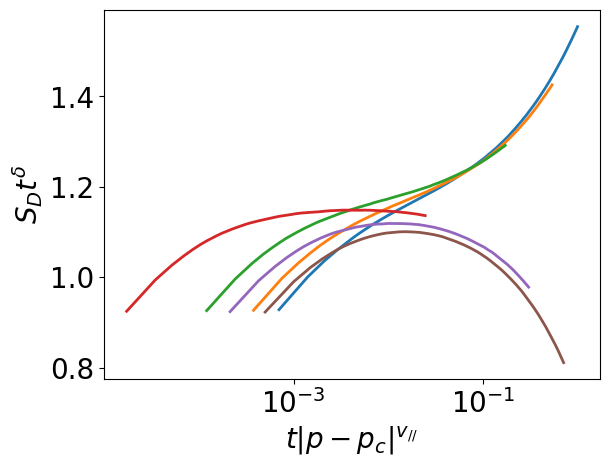

In [108]:
file_idx = 104

file_name = "../data/240414/240414_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nstep_l)))

# nv = 1.73
nv = 1.401
# pc = 0.2051
pc = 0.2056
# pc = 0.2056
# delta = 0.1565413357306199
# delta = 0.159 # DP
delta = 0.1623
for pertb_idx in range(0,len(pertb_l),1):
    xplot = nstep_l[0:] * np.abs(pertb_l[pertb_idx]-pc)**nv
    yplot = S_ave_arr[pertb_idx,0:] * nstep_l[0:]**delta
    plt.plot(xplot,yplot)

# plt.xlim([1e-5,1e-1])
plt.xlabel("$t |p-p_c|^{v_{//}}$")
plt.ylabel("$S_D t^{\delta}$")
plt.xscale('log')

In [110]:
pc = 0.2056

def fit_exp(x):
    nv = x[0]
    delta = x[1]
    xm_ground = nstep_l[0:] * np.abs(pertb_l[0]-pc)**nv
    ym_ground = S_ave_arr[0,0:] * nstep_l[0:]**delta
    xp_ground = nstep_l[0:] * np.abs(pertb_l[-1]-pc)**nv
    yp_ground = S_ave_arr[0,0:] * nstep_l[0:]**delta
    
    cost = 0
    for pertb_idx in range(1,3,1):
        x = nstep_l[0:] * np.abs(pertb_l[pertb_idx]-pc)**nv
        y = S_ave_arr[pertb_idx,0:] * nstep_l[0:]**delta
        interp = interpolate.interp1d(x, y)
        xm_ground_interp = xm_ground[np.logical_and(xm_ground > 1e-2, xm_ground < x[-1])]
        if len(xm_ground_interp) == 0:
            continue
        ym_ground_interp = interp(xm_ground_interp)
        
        cost += np.linalg.norm(ym_ground_interp-ym_ground[np.logical_and(xm_ground > 1e-2, xm_ground < x[-1])])/len(ym_ground_interp)

    for pertb_idx in range(4,5,1):
        x = nstep_l[0:] * np.abs(pertb_l[pertb_idx]-pc)**nv
        y = S_ave_arr[pertb_idx,0:] * nstep_l[0:]**delta
        interp = interpolate.interp1d(x, y)
        xp_ground_interp = xp_ground[np.logical_and(xp_ground > 1e-2, xp_ground < x[-1])]
        if len(xp_ground_interp) == 0:
            continue
        yp_ground_interp = interp(xp_ground_interp)
        cost += np.linalg.norm(yp_ground_interp-yp_ground[np.logical_and(xp_ground > 1e-2, xp_ground < x[-1])])/len(yp_ground_interp)

    return cost

x0 = (1.73,0.159)
xp = minimize(fit_exp,x0,method = 'Nelder-Mead')
# fit_exp(x0)

print(xp,pc)


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.013386288049426443
             x: [ 1.401e+00  1.623e-01]
           nit: 26
          nfev: 57
 final_simplex: (array([[ 1.401e+00,  1.623e-01],
                       [ 1.401e+00,  1.623e-01],
                       [ 1.401e+00,  1.623e-01]]), array([ 1.339e-02,  1.339e-02,  1.339e-02])) 0.2056


### t=4.5*nBsites

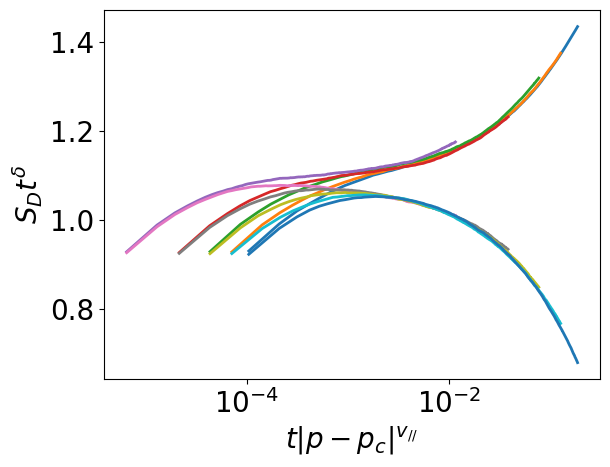

In [5]:
file_idx = 154

file_name = "../data/240414/240414_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nstep_l)))

nv = 1.73
pc = 0.205
# pc = 0.2056
delta = 0.14734128796629004
# delta = 0.159
# delta = 0.1240125838019527
for pertb_idx in range(0,len(pertb_l),1):
    xplot = nstep_l[0:] * np.abs(pertb_l[pertb_idx]-pc)**nv
    yplot = S_ave_arr[pertb_idx,0:] * nstep_l[0:]**delta
    plt.plot(xplot,yplot)

# plt.xlim([1e-5,1e-1])
plt.xlabel("$t |p-p_c|^{v_{//}}$")
plt.ylabel("$S_D t^{\delta}$")
plt.xscale('log')

## Rule 30 MIPT check running exponents Multiple Bits
Asites=1:4, Bsites=400, nsteps=0.5*nBsite p=0.15:0.01:0.25, 301-304 oneMeas 1k nsim

Asites=1:4, Bsites=400, nsteps=3.5*nBsite p=0.15:0.01:0.25, 311-314 oneMeas 1k nsim

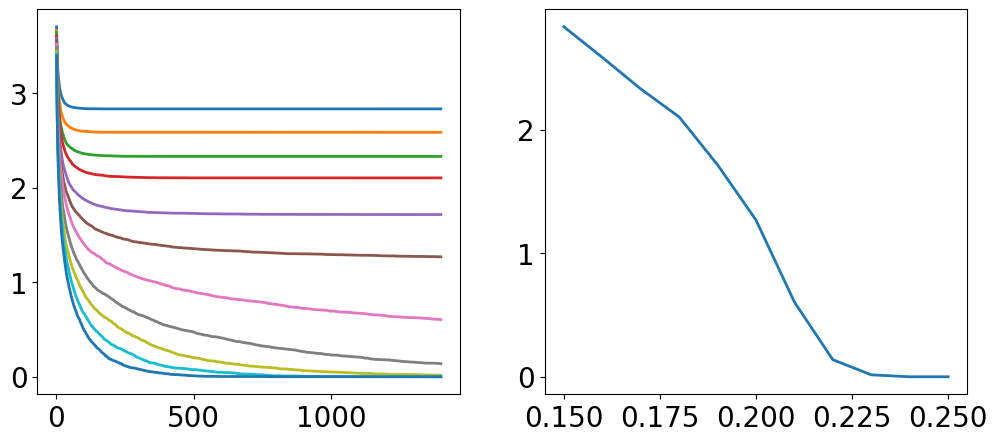

In [18]:
file_idx = 314
# file_name = "../data/240414/240414_n%d_pp.npz"%(file_idx)
# raw = np.load(file_name)
# nmeas_l = raw['y_l']
# nsteps_l = raw['x_l']
# pertb_l = raw['z_l']
# S_ave_arr = raw['data_ave_l']
# S_std_arr = raw['data_std_l']

file_name = "../data/240414/240414_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for pertb_idx in range(0,len(pertb_l),1):
    plt.plot(nstep_l,S_ave_arr[pertb_idx,:])
#     plt.plot(np.arange(2*nsteps_l[-1]), S_ave_arr[pertb_idx,10,:])
plt.subplot(1,2,2)
plt.plot(pertb_l,S_ave_arr[:,-1])

/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_53979/4002255131.py:14: RuntimeWarning: divide by zero encountered in divide
  plt.plot((1/np.arange(int(len(nstep_l)/base))), delta_l, '.-')
/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_53979/4002255131.py:15: RuntimeWarning: divide by zero encountered in divide
  plt.plot((1/np.arange(int(len(nstep_l)/base)))[-50:], delta_l[-50:], '.-')
/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_53979/4002255131.py:17: RuntimeWarning: divide by zero encountered in divide
  slope, intercept = np.polyfit((1/np.arange(int(len(nstep_l)/base)))[-nfit:], delta_l[-nfit:], deg=1)
/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_53979/4002255131.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  delta_l.append(np.emath.logn(base,S_l[t]/S_l[base*t]))


Text(0, 0.5, '$\\delta(t)$')

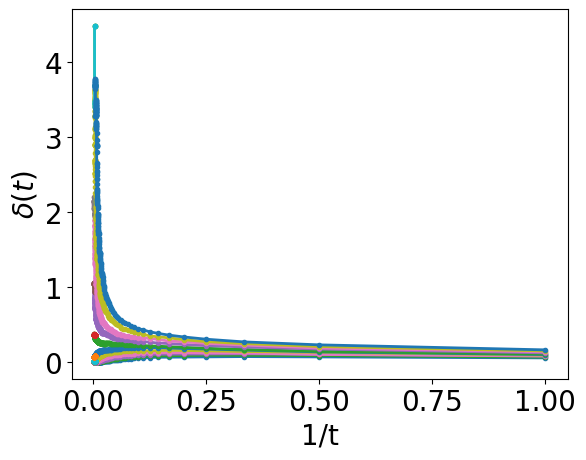

In [19]:
base = 4

slope_l = []
intercept_l = []
for pertb_idx, pertb in enumerate(pertb_l):
    # if pertb < 0.15 or pertb > 0.21:
    #     continue
    # if pertb_idx < 0 or pertb_idx > 12:
    #     continue
    S_l = S_ave_arr[pertb_idx,:]
    delta_l = []
    for t in range(int(len(nstep_l)/base)):
        delta_l.append(np.emath.logn(base,S_l[t]/S_l[base*t]))
    plt.plot((1/np.arange(int(len(nstep_l)/base))), delta_l, '.-')
    plt.plot((1/np.arange(int(len(nstep_l)/base)))[-50:], delta_l[-50:], '.-')
    nfit = 10
    slope, intercept = np.polyfit((1/np.arange(int(len(nstep_l)/base)))[-nfit:], delta_l[-nfit:], deg=1)
    slope_l.append(slope)
    intercept_l.append(intercept)

    # for t in range(int(len(nstep_l)/10)):
    #     delta_l.append(np.log10(S_l[t]/S_l[2*t]))
    # plt.plot(1/np.arange(int(len(nstep_l)/10)), delta_l)

# plt.xlim([1/int(len(nstep_l)/base),0.1])
plt.xlabel("1/t")
plt.ylabel("$\delta(t)$")

0.2 0.15599301504200705


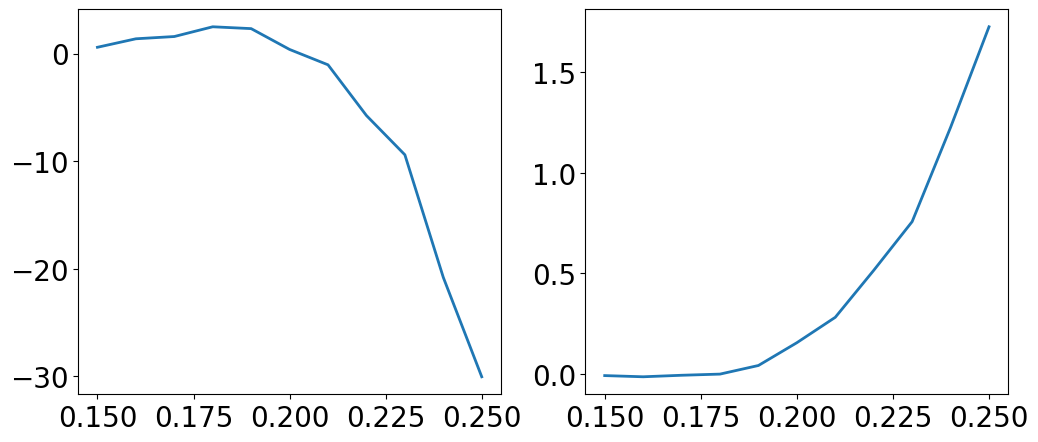

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(pertb_l,slope_l)
plt.subplot(1,2,2)
plt.plot(pertb_l,intercept_l)

idxmin = np.argmin(np.abs(slope_l))
pc = pertb_l[idxmin]
delta = intercept_l[idxmin]
print(pc,delta)

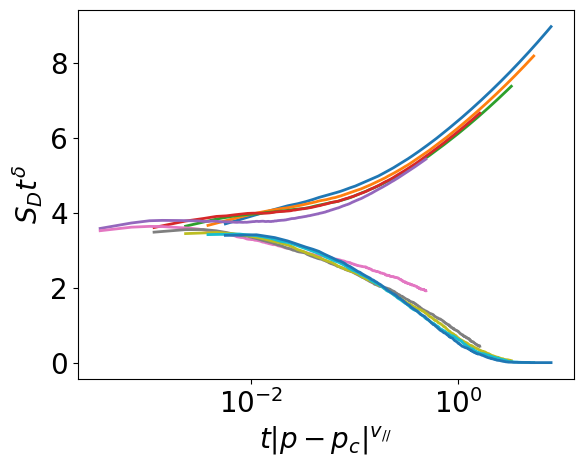

In [20]:
file_idx = 314

file_name = "../data/240414/240414_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nstep_l)))

nv = 1.73
pc = 0.2
# pc = 0.2056
# delta = 0.1559
delta = 0.159
# delta = 0.1240125838019527
for pertb_idx in range(0,len(pertb_l),1):
    xplot = nstep_l[0:] * np.abs(pertb_l[pertb_idx]-pc)**nv
    yplot = S_ave_arr[pertb_idx,0:] * nstep_l[0:]**delta
    plt.plot(xplot,yplot)

# plt.xlim([1e-5,1e-1])
plt.xlabel("$t |p-p_c|^{v_{//}}$")
plt.ylabel("$S_D t^{\delta}$")
plt.xscale('log')

publication plot

/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_53979/1718551389.py:37: RuntimeWarning: divide by zero encountered in divide
  plt.plot((1/np.arange(int(len(nstep_l)/base))), delta_l, '.-',c=cmap(c_intensity+0.2))
/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_53979/1718551389.py:40: RuntimeWarning: divide by zero encountered in divide
  slope, intercept = np.polyfit((1/np.arange(int(len(nstep_l)/base)))[-nfit:], delta_l[-nfit:], deg=1)
/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_53979/1718551389.py:36: RuntimeWarning: divide by zero encountered in double_scalars
  delta_l.append(np.emath.logn(base,S_l[t]/S_l[base*t]))


Text(0, 0.5, '$\\delta(t)$')

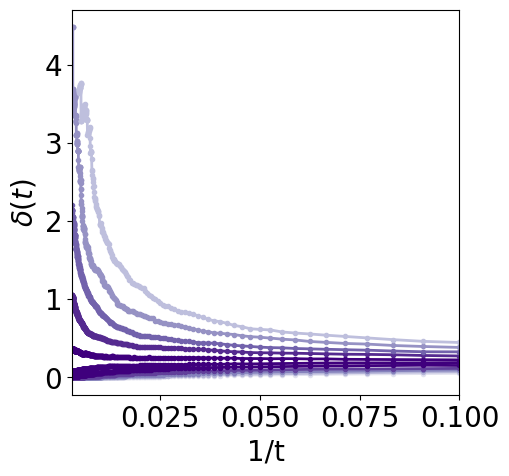

In [22]:
file_idx = 314
# file_name = "../data/240414/240414_n%d_pp.npz"%(file_idx)
# raw = np.load(file_name)
# nmeas_l = raw['y_l']
# nsteps_l = raw['x_l']
# pertb_l = raw['z_l']
# S_ave_arr = raw['data_ave_l']
# S_std_arr = raw['data_std_l']

file_name = "../data/240414/240414_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nstep_l)))

base = 4
cmap = mpl.colormaps['Purples']
idx_center = 5
plt.figure(figsize=(5,5))

slope_l = []
intercept_l = []
for pertb_idx, pertb in enumerate(pertb_l):
    if pertb_idx <= idx_center:
        c_intensity = pertb_idx / idx_center
    else:
        c_intensity = (len(pertb_l)-pertb_idx) / (len(pertb_l)-idx_center)
    # if pertb < 0.15 or pertb > 0.21:
    #     continue
    # if pertb_idx < 0 or pertb_idx > 12:
    #     continue
    S_l = S_ave_arr[pertb_idx,:]
    delta_l = []
    for t in range(int(len(nstep_l)/base)):
        delta_l.append(np.emath.logn(base,S_l[t]/S_l[base*t]))
    plt.plot((1/np.arange(int(len(nstep_l)/base))), delta_l, '.-',c=cmap(c_intensity+0.2))
    # plt.plot((1/np.arange(int(len(nstep_l)/base)))[-50:], delta_l[-50:], '.-')
    nfit = 10
    slope, intercept = np.polyfit((1/np.arange(int(len(nstep_l)/base)))[-nfit:], delta_l[-nfit:], deg=1)
    slope_l.append(slope)
    intercept_l.append(intercept)

    # for t in range(int(len(nstep_l)/10)):
    #     delta_l.append(np.log10(S_l[t]/S_l[2*t]))
    # plt.plot(1/np.arange(int(len(nstep_l)/10)), delta_l)

plt.xlim([1/int(len(nstep_l)/base),0.1])
plt.xlabel("1/t")
plt.ylabel("$\delta(t)$")